# Atlantic Technological University
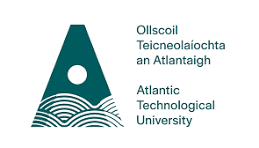

# Higher Diploma in Science in Computing (Data Analytics)-Level 8

# Applied Statistics 24-25

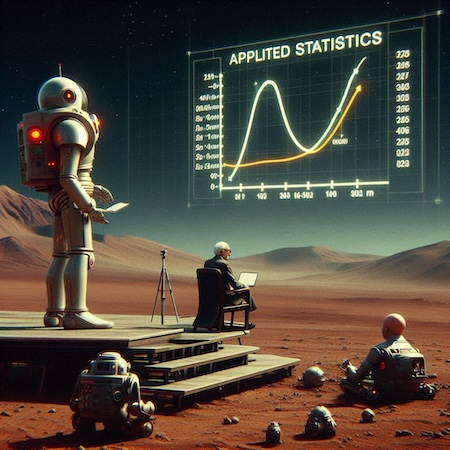

# Final Project

## Due: last commit 20 December 2024

### Author: Jean-Samuel Bonsenge-Bokanga

### Introduction

For the purpose of the Higher Diploma in Science in Computing in Data Analytics, I am required to submit a project as part of the Applied Statistics module assessment. The notebook file is called **project.ipynb** and will carried out computation operations as per the instructions below, using the Python Programming Language.

### Instructions

Complete the project in a single notebook called **project.ipynb** in your repository. The same style should be used as detailed above: explanations in MarkDown and code comments, clean code, and regular commits. Use plots as appropriate.

In this project, you will analyze the **PlantGrowth R** dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups.

Your task is to perform **t-tests and ANOVA** on this dataset while describing the dataset and explaining your work. In doing this you should:

**Download and save the dataset** to your repository.

**Describe the data set** in your notebook.

**Describe what a t-test is, how it works, and what the assumptions are.**

**Perform a t-test** to determine whether there is a significant difference between the two treatment groups **trt1 and trt2.

**Perform ANOVA** to determine whether there is a significant difference between the three treatment groups **ctrl, trt1, and trt2.

**Explain why it is more appropriate to apply ANOVA** rather than several t-tests when analyzing more than two groups.



# Dataset

## PlantGrowth R Dataset.

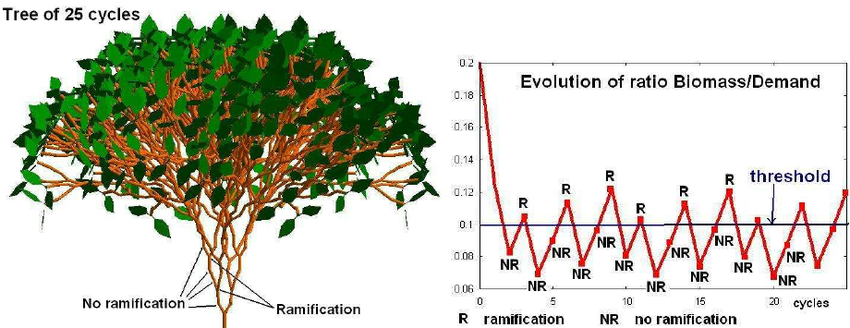

### PlantGrowth R Dataset Summary

##### Reference: https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html

The PlantGrowth dataset in R is a built-in dataset often used in statistical analysis and teaching. It contains data about the effet of different treatments on plant growth. It provides results from an Experiment on Plant Growth. These results are useful to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions.
The Dataset is a data frame of 30 cases on two variables: weights (integer or numerical) and group (fator or string) indicating the treatment group to which the plant belongs. It has three levels: ctrl(control group), trt1 (treatment 1) and trt2 (treatment 2). 

The PlantGrowth dataset is commonly used to demontraste : 

1. descriptive statistics by summarising the weights by group; 
2. ANOVA: to test if there is a significante difference in plant growth between the groups, and 
3. Visualization using Boxplots and other plots to compare group distributions. 

Please refer to:

Dobson, A. J. (1983) An Introduction to Statistical Modelling. London: Chapman and Hall. 

PlantGrowth dataset, R Base Package, R Core Team (2024). Available at: https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/PlantGrowth (Accessed on 05/12/2024)


#### PlantGrowth	R Documentation

Results from an Experiment on Plant Growth

#### Description

Results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions.

#### Usage

PlantGrowth

#### Format
A data frame of 30 cases on 2 variables.

[, 1]	weight	numeric
[, 2]	group	factor

The levels of group are ‘ctrl’, ‘trt1’, and ‘trt2’.

#### Source

Dobson, A. J. (1983) An Introduction to Statistical Modelling. London: Chapman and Hall.



## Relevant Python Libraries

In [15]:
# Efficient numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Alternative statistics package.
import statsmodels.stats.weightstats as stats

# Main statistics package.
import scipy.stats as ss

# Main statistics package without a diminutive.
from scipy import stats  

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")


## Dataset Downloading using df.pd.read_csv() function.

In [2]:
# Downlaod the PlantGrowth.CSV file using pd.read_csv () function.
df = pd.read_csv('PlantGrowth.csv')

In [3]:
# Access the PlantGrowth dataset calling df variable.
df

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


 ### Dataset Statistical Summary [descriptive statistics]

In [4]:
# Statistical Summary.
df.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


### Let's seek the std of weight by group

In [4]:
# Calculate std for "weight" grouped by "group"
group_std = df.groupby("group")["weight"].std()

print("Standard deviation of weight by group:")
print(group_std)


Standard deviation of weight by group:
group
ctrl    0.583091
trt1    0.793676
trt2    0.442573
Name: weight, dtype: float64


Analysis: I note that each group has a different std to and from the mean.

### Let's seek rownames and weight std individually

In [7]:
# Setting rownames explicitly for demonstration (similar to rownames in R)
df.index = [f"row{i+1}" for i in range(len(df))]


In [8]:
df.index

Index(['row1', 'row2', 'row3', 'row4', 'row5', 'row6', 'row7', 'row8', 'row9',
       'row10', 'row11', 'row12', 'row13', 'row14', 'row15', 'row16', 'row17',
       'row18', 'row19', 'row20', 'row21', 'row22', 'row23', 'row24', 'row25',
       'row26', 'row27', 'row28', 'row29', 'row30'],
      dtype='object')

In [9]:
# Standard deviation of row names (numeric indices)
rownames_std = pd.Series(df.index.str.extract(r'(\d+)$', expand=False).astype(int)).std()

In [10]:
rownames_std 

8.803408430829505

In [11]:
# Standard deviation of "weight"
weight_std = df["weight"].std()

In [12]:
weight_std

0.7011918425081685

In [13]:
print("Standard deviation of rownames (numeric part):", rownames_std)
print("Standard deviation of weight:", weight_std)


Standard deviation of rownames (numeric part): 8.803408430829505
Standard deviation of weight: 0.7011918425081685


Analysis: I note that the rownames (integer component) is greater to and from the mean than that of weight. 

### Display the top 5 dataset elements using the df.head() function.

In [5]:
# Display the top 5 dataset elements using the df.head() function.
df.head()

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


### Display the last 5 dataset elements using the df.tail() function. 

In [6]:
# display the last 5 dataset elements using the df.tail() function.
df.tail()

,rownames,weight,group
25,26,5.29,trt2
26,27,4.92,trt2
27,28,6.15,trt2
28,29,5.80,trt2
29,30,5.26,trt2


## Different ways for the group column dataset representation: 
df.loc(), .grouped.get_group() and looping over populated below:

### Accessing fators 'ctrl' using ctrl_group variable, df.loc() and .grouped.get_group() functions

#### df.loc()

In [15]:
# Access fator 'ctrl' using ctrl_group variable.
ctrl_group = df.loc[df['group'] == 'ctrl']
# Execute the script.
print(ctrl_group)

   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl
5         6    4.61  ctrl
6         7    5.17  ctrl
7         8    4.53  ctrl
8         9    5.33  ctrl
9        10    5.14  ctrl


### .groupby()

In [14]:
# group data by group using .groupby()
grouped = df.groupby('group') 
# access the sub-group 'ctrl'
ctrl_group = grouped.get_group('ctrl')
#excecute the code.
print(ctrl_group)

   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl
5         6    4.61  ctrl
6         7    5.17  ctrl
7         8    4.53  ctrl
8         9    5.33  ctrl
9        10    5.14  ctrl


### Access fator 'trt1' using trt1_group variable via df.loc()

In [15]:
# Access fator 'trt1' using trt1_group variable.
trt1_group = df.loc[df['group'] == 'trt1']
# Execute the script.
print(trt1_group)

    rownames  weight group
10        11    4.81  trt1
11        12    4.17  trt1
12        13    4.41  trt1
13        14    3.59  trt1
14        15    5.87  trt1
15        16    3.83  trt1
16        17    6.03  trt1
17        18    4.89  trt1
18        19    4.32  trt1
19        20    4.69  trt1


### Access fator 'trt2' using trt2_group variable via df.loc()

In [16]:
# Access fator 'trt2' using trt2_group variable.
trt2_group = df.loc[df['group'] == 'trt2']
# Execute the script.
print(trt2_group)

    rownames  weight group
20        21    6.31  trt2
21        22    5.12  trt2
22        23    5.54  trt2
23        24    5.50  trt2
24        25    5.37  trt2
25        26    5.29  trt2
26        27    4.92  trt2
27        28    6.15  trt2
28        29    5.80  trt2
29        30    5.26  trt2


### Show the Dataset 'group' column ONLY and its fators:ctrl, trt1 and trt2 within a loop

In [17]:
# Display only the 'group' column and corresponding indexes.
print(df['group'])

0     ctrl
1     ctrl
2     ctrl
3     ctrl
4     ctrl
5     ctrl
6     ctrl
7     ctrl
8     ctrl
9     ctrl
10    trt1
11    trt1
12    trt1
13    trt1
14    trt1
15    trt1
16    trt1
17    trt1
18    trt1
19    trt1
20    trt2
21    trt2
22    trt2
23    trt2
24    trt2
25    trt2
26    trt2
27    trt2
28    trt2
29    trt2
Name: group, dtype: object


### Show a particular fator: ctrl, trt1 and trt2.

In [18]:
# Show a particular fator: ctrl, trt1 and trt2.
fators = df['group'].unique()
# execute.
print(f"Fators: {fators}")


Fators: ['ctrl' 'trt1' 'trt2']


In [20]:
# Use a for loop to loop over fators and display each fator one by one with 
# their corresponding index, rawname and weight
for fator in fators: 
    # access sub-group data
    fator_data = df.loc[df['group'] == fator]
    # execute.
    print(f"nData for fator'{fator}': ")
    # Call subgroup_data variable and execute.
    print(fator_data)

nData for fator'ctrl': 
   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl
5         6    4.61  ctrl
6         7    5.17  ctrl
7         8    4.53  ctrl
8         9    5.33  ctrl
9        10    5.14  ctrl
nData for fator'trt1': 
    rownames  weight group
10        11    4.81  trt1
11        12    4.17  trt1
12        13    4.41  trt1
13        14    3.59  trt1
14        15    5.87  trt1
15        16    3.83  trt1
16        17    6.03  trt1
17        18    4.89  trt1
18        19    4.32  trt1
19        20    4.69  trt1
nData for fator'trt2': 
    rownames  weight group
20        21    6.31  trt2
21        22    5.12  trt2
22        23    5.54  trt2
23        24    5.50  trt2
24        25    5.37  trt2
25        26    5.29  trt2
26        27    4.92  trt2
27        28    6.15  trt2
28        29    5.80  trt2
29        30    5.26  trt2


### Put all blocs of code into a single entity of code to reach the same above output

In [21]:
# Display only the 'group' column and corresponding indexes.
print(df['group'])

# Show a particular fator: ctrl, trt1 and trt2.
fators = df['group'].unique()
# execute.
print(f"Fators: {fators}")

# Use a for loop to loop over fators and display each fator one by one with 
# their corresponding indexes, rawnames and weights.
for fator in fators: 
    # access fator data
    fator_data = df.loc[df['group'] == fator]
    # execute.
    print(f"nData for fator'{fator}': ")
    # Call fator_data variable and execute.
    print(fator_data)
               


0     ctrl
1     ctrl
2     ctrl
3     ctrl
4     ctrl
5     ctrl
6     ctrl
7     ctrl
8     ctrl
9     ctrl
10    trt1
11    trt1
12    trt1
13    trt1
14    trt1
15    trt1
16    trt1
17    trt1
18    trt1
19    trt1
20    trt2
21    trt2
22    trt2
23    trt2
24    trt2
25    trt2
26    trt2
27    trt2
28    trt2
29    trt2
Name: group, dtype: object
Fators: ['ctrl' 'trt1' 'trt2']
nData for fator'ctrl': 
   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl
5         6    4.61  ctrl
6         7    5.17  ctrl
7         8    4.53  ctrl
8         9    5.33  ctrl
9        10    5.14  ctrl
nData for fator'trt1': 
    rownames  weight group
10        11    4.81  trt1
11        12    4.17  trt1
12        13    4.41  trt1
13        14    3.59  trt1
14        15    5.87  trt1
15        16    3.83  trt1
16        17    6.03  trt1
17        18    4.89  trt1
18        19    4.32  trt1
19      

### Select all fators from the Dataset using df.loc().

In [23]:
# Select all fators(ctrl, trt1 and trt2) from the Dataset group column using df.loc().
df.loc[0:30, ['group']]

,group
0,ctrl
1,ctrl
2,ctrl
3,ctrl
4,ctrl
5,ctrl
6,ctrl
7,ctrl
8,ctrl
9,ctrl


### Select ctrl group ONLY using the df.iloc()

In [79]:
# Select ctrl fator ONLY using the df.iloc()
df.iloc[0:10]

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [24]:
# Select trt1 fator ONLY using the df.iloc()
df.iloc[10:20]

,rownames,weight,group
10,11,4.81,trt1
11,12,4.17,trt1
12,13,4.41,trt1
13,14,3.59,trt1
14,15,5.87,trt1
15,16,3.83,trt1
16,17,6.03,trt1
17,18,4.89,trt1
18,19,4.32,trt1
19,20,4.69,trt1


In [81]:
# Select trt2 fator ONLY using the df.iloc()
df.iloc[20:30]

,rownames,weight,group
20,21,6.31,trt2
21,22,5.12,trt2
22,23,5.54,trt2
23,24,5.50,trt2
24,25,5.37,trt2
25,26,5.29,trt2
26,27,4.92,trt2
27,28,6.15,trt2
28,29,5.80,trt2
29,30,5.26,trt2


Analysis: I note that all functions of Pandas DataFrame as well as a for loop demontrate that fators(ctrl, trt1 and trt2) are divided into tree sections of ten each.

# PART 1

# $t$-Tests

<img src="https://imgs.xkcd.com/comics/correlation_2x.png" alt="xkcd" width="500"/>

# t-Tests Description

## What is a t-Test?

### Definition: 

**t-Tests** are used to compare the means of two sets of data to each other, or the mean of one set of data against a particular value (such as zero) (Neural Data Science.io): https://neuraldatascience.io/5-eda/ttests.html

### t-Test Types:

- Simple t-Test (One-Sample t-Test)
- Two-sample t-Test
- Paired and Unpaired t-Tests
- Welch's Test

### 1. Simple t-Test

A simple t-Test or 1-sample t-Test is used to compare the mean of one set of data against a specific value. This is often used to compare a data set to zero (Neural data Science.i.o). The one-sample t-test is a statistical hypothesis test that helps determine if an unknown population mean (mu) does not equal a claimed value (Data Camp.com). A one-sample t-test can be run on sample data from a normally distributed variable to test if a population mean μ is equal to a specific claimed value (Texas. The University of Texas at Austin).

<span style="font-size:30px;">$$t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$</span>

Where, t = t-statistic, x = sample mean. 𝝁 = population mean. s = sample standard deviation. n = number of examples in the sample.


### A Two-sample t-Test

<span style="font-size:30px;">$\
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
\$</span>

Where, t= represents the t-statistic, x1= first sample mean;  x2 = second sample mean; s1 = first sample standard deviation; s2 = second sample standard deviation; n1 = first sample size, and n2 = second sample size (datacamp.com, 2024). In another word, t is the t value, x1 and x2 are the means of the two groups being compared, s2 is the pooled standard error of the two groups, and n1 and n2 are the number of observations in each of the groups. 

A Two-sample t-Test is a test for the null hypothesis that 2 independent samples have identical average (expected) values. It assumes that the populations have identical variances by default, and calculates the T-test for the means of two independent samples of scores. (docs.scipy.org, 2024). A larger t value shows that the difference between group means is greater than the pooled standard error, indicating a more significant difference between the groups (scribbr.com).


### Unpaired t-Test (Independent t-Test)

<span style="font-size:30px;">$$t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$</span>


Where x1, x2 = means of the two groups; s2/1, s2/2: variances of the two groups, and n1, n2: sample sizes of the two groups.

An unpaired t-Test is used to compare two independent sets of data (e.g., from two different samples of a population, two groups, etc.).

### A paired t-Test

<span style="font-size:30px;">$$t = \frac{\bar{d}}{\frac{s_d}{\sqrt{n}}}$$</span>

Where, d: Mean of the differences; std: Standard deviation of the differences, and sqrt : Number of paired observations.

A paired t-Test is used to compare the means of two related groups (e.g., before-and-after measurements).A paired t-test must be used when the two sets of data come from the same samples (e.g., the same individual participants).

Paired t tests and 1-sample t tests can both be used to determine whether differences between two samples are significantly different from zero (no difference). 


### Welch's test

<span style="font-size:30px;">$\
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
\$</span>


Welch’s t-test, is the non-parametric equivalent of the two-sample t-test.


### Reference:

[An Introduction to t Tests | Definitions, Formula and Examples
Published on January 31, 2020 by Rebecca Bevans. Revised on June 22, 2023.]. Available at: https://www.scribbr.com/statistics/t-test/#:~:text=A%20t%2Dtest%20is%20a,means%20is%20different%20from%20zero. (Accessed on 07/12/2024)

scipy.stats.
ttest_ind
ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0, *, keepdims=False)[source : https://github.com/scipy/scipy/blob/v1.14.1/scipy/stats/_stats_py.py#L6706-L7030]

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html





Docs.scipy.org(2024) scipy.stats.
ttest_ind. Avaialable at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html(Accessed on 07/12/2024)


Data camp.com (2024) An Introduction to Python T-Tests. Available at:
https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests?dc_referrer=https%3A%2F%2Fwww.rdocumentation.org%2F&utm_source=r-docs&utm_medium=docs&utm_term=PlantGrowth&utm_content=run_example_in_datalab (Accessed on 07/12/2024)

Neural Data Science(2024) Basic Statistics in Python: t tests with SciPy. Available at: 
https://neuraldatascience.io/5-eda/ttests.html (Accessed on 07/12/2024)


Texas. The University of Texas at Austin(2024) One-Sample Test. Available at:
https://sites.utexas.edu/sos/guided/inferential/numeric/claim/one-sample-t/#:~:text=The%20test%20statistic%2C%20t%2C%20is,by%20the%20estimated%20standard%20error%20.(Accessed on 07/12/2024)





## How it works?

Suppose we observe two independent samples, e.g. flower petal lengths, and we are considering whether the two samples were drawn from the same population (e.g. the same species of flower or two species with similar petal characteristics) or two different populations.

The t-test quantifies the difference between the arithmetic means of the two samples. The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true. A p-value larger than a chosen threshold (e.g. 5% or 1%) indicates that our observation is not so unlikely to have occurred by chance. Therefore, we do not reject the null hypothesis of equal population means. If the p-value is smaller than our threshold, then we have evidence against the null hypothesis of equal population means. docs.scipy.org(2024) SciPy API Statistical functions (scipy.stats)
ttest_ind. Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html(Accessed on 07/12/2024)

## t-Tests General application

## A 1-sample t-Test

A company claims to produce ball bearings of 10 cm diameter (null hypothesis), and you decide to audit if that is true. You collect 21 ball bearings from multiple shops around the city and measure their diameter. You must determine if the company’s claim is false (alternate hypothesis) based on the measurements.

The test is designed as follows:

Null Hypothesis:             H0 : x  = 𝝁

Alternate Hypothesis:  Ha : x  ≠ 𝝁 

T-test flow diagram

To declare the claims as false, you need to statistically prove that the measurements from the sample of bearings are different from the 10 cm claimed by the company. As the sample size is 21 (which is less than 30), we use a t-test. Here the sample mean is 11 cm, and the standard deviation is 1 cm.

#### a one-sample t-test in Python using the scipy.stats.ttest_1samp() function
https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests?dc_referrer=https%3A%2F%2Fwww.rdocumentation.org%2F&utm_source=r-docs&utm_medium=docs&utm_term=PlantGrowth&utm_content=run_example_in_datalab

In [8]:
# Population Mean 
mu = 10

# Sample Size
N1 = 21

# Degrees of freedom  
dof = N1 - 1

# Generate a random sample with mean = 11 and standard deviation = 1
x = np.random.randn(N1) + 11

# Using the Stats library, compute t-statistic and p-value
t_stat, p_val = stats.ttest_1samp(a=x, popmean = mu)
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val)) 

t-statistic = 4.666352081152527
p-value = 0.00014858112542455603


## A two-sample t-Test
Let’s consider that the first factory shares 21 samples of ball bearings where the mean diameter of the sample comes out to be 10.5 cm. On the other hand, the second factory shares 25 samples with a mean diameter of 9.5 cm. Both have a standard deviation of 1 cm. 
https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests?dc_referrer=https%3A%2F%2Fwww.rdocumentation.org%2F&utm_source=r-docs&utm_medium=docs&utm_term=PlantGrowth&utm_content=run_example_in_datalab

In [9]:
# Sample Sizes
N1, N2 = 21, 25

# Degrees of freedom  
dof = min(N1,N2) - 1

# Gaussian distributed data with mean = 10.5 and var = 1  
x = np.random.randn(N1) + 10.5

# Gaussian distributed data with mean = 9.5 and var = 1  
y = np.random.randn(N2) + 9.5

## Using the internal function from SciPy Package  
t_stat, p_val = stats.ttest_ind(x, y)  
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))

t-statistic = 3.412621867385491
p-value = 0.0013910260779184094


## Impaired or independent t-Test

In [10]:
# Import Stastical Package
from scipy.stats import ttest_ind

# Sample data for two groups
group1 = [2.1, 2.5, 2.8, 3.0, 3.3]
group2 = [2.3, 2.6, 3.1, 3.2, 3.8]

# Perform independent t-test
t_stat, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")


T-statistic: -0.785, P-value: 0.455


## Paired t-Test

In [11]:
# Import Stactical Package.
from scipy.stats import ttest_rel

# Sample data for paired groups
before = [2.1, 2.5, 2.8, 3.0, 3.3]
after = [2.2, 2.6, 2.9, 3.1, 3.5]

# Perform paired t-test.
t_stat, p_value = ttest_rel(before, after)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")


T-statistic: -6.000, P-value: 0.004


## Welch’s t-test in Python

Suppose we want to compare the exam scores of 12 students
who used an exam prep booklet to prepare for some exam vs. 12 students who did not.
The following code shows how to perform Welch’s t-test in Python to determine if 
the mean exam scores are equal between the two groups:
https://statisticalpoint.com/welch-t-test-python/


In [14]:
#import ttest_ind() function
from scipy import stats

#define two arrays of data
booklet = [90, 85, 88, 89, 94, 91, 79, 83, 87, 88, 91, 90]
no_booklet = [67, 90, 71, 95, 88, 83, 72, 66, 75, 86, 93, 84]

#perform Welch's t-test 
stats.ttest_ind(booklet, no_booklet, equal_var = False)



Ttest_indResult(statistic=2.236067977499793, pvalue=0.041709795032077744)

## T-test Assumptions
https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests?dc_referrer=https%3A%2F%2Fwww.rdocumentation.org%2F&utm_source=r-docs&utm_medium=docs&utm_term=PlantGrowth&utm_content=run_example_in_datalab

T-Tests assumptions are of 4 types.These include:property of independece, indentically distributed, normally distributed and equal variances.


1. **Property of Independence**

Observations are not influenced by any implicit factor in the data and are not correlated over time. To ensure independence, various techniques can be applied to deal with dependent data. the measurements for each sample subject are in no way influenced by or related to the measurements of other subjects (datacamp.com, University of Texas at Austin).https://sites.utexas.edu/sos/indobs/

2. **Identically Distributed**

Outliers, or anomalous data records, can impact the lower t-statistic value and lead to increased variance in the data, affecting the probability of rejecting the null hypothesis.

3. **Normally Distributed**

The t-test is only valid for normally distributed data. Skewed data may lead to incorrect rejection of the null hypothesis.

4. **Equal Variances**

The two populations being compared should have equal variances for the t-test to hold. This can be tested graphically using a Q-Q plot ( Please an example of a Q-Q plot (Quantile-Quantile plot) below:

### References:

University of Texas (2024)Independent Observations Assumption. Available at: https://sites.utexas.edu/sos/indobs/(Accessed on 07/12/2024)

Data Camp.org (2024) An Introduction to Python T-Tests. Available at: https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests?dc_referrer=https%3A%2F%2Fwww.rdocumentation.org%2F&utm_source=r-docs&utm_medium=docs&utm_term=PlantGrowth&utm_content=run_example_in_datalab (Accessed on 07/12/2024)

### Equal Variances Assumption General Application
https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests?dc_referrer=https%3A%2F%2Fwww.rdocumentation.org%2F&utm_source=r-docs&utm_medium=docs&utm_term=PlantGrowth&utm_content=run_example_in_datalab

In [15]:
# Generate some data (e.g., normally distributed)
data = np.random.normal(loc=0, scale=1, size=1000)



In [16]:
data

array([-1.79161833e+00,  6.60432948e-01,  2.76549696e-02,  4.59476143e-01,
        1.13954067e+00, -3.80447949e-01, -4.60371124e-01,  1.19780612e+00,
       -4.60922811e-01,  3.75233734e-01,  1.46565311e+00,  6.86162218e-01,
        3.27713316e-01,  6.66942318e-02, -1.37630242e+00,  8.45740288e-01,
        9.57429417e-03, -1.54471171e+00,  1.50215743e-04,  1.18185108e+00,
        1.24811026e+00,  4.17167294e-02, -4.34623075e-01,  1.28767583e+00,
       -1.02975697e+00,  2.15811711e+00, -3.39303699e-01,  1.21437869e+00,
        5.14147323e-01,  6.03389067e-01,  2.03993794e+00,  1.25643083e+00,
        4.20562604e-01,  8.85819265e-01,  1.37483215e-01,  2.66279573e-01,
        1.83473207e+00,  1.43729966e+00,  1.46175797e-01,  1.46495273e+00,
       -9.46354077e-01,  1.86994767e+00,  4.50324273e-01, -8.60320362e-01,
       -7.52477209e-01,  2.58188855e+00, -1.05359991e+00,  8.91028775e-01,
        2.98712068e-01, -1.07508521e+00, -6.84499991e-01, -1.60479735e-01,
        7.46524660e-01,  

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

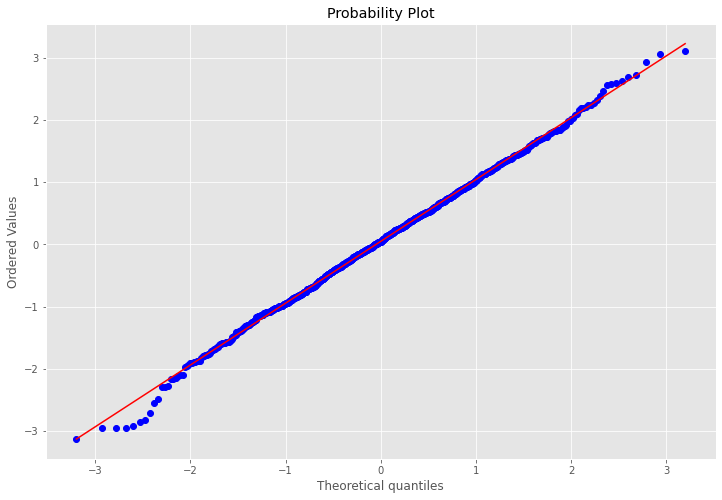

In [17]:
# Create the Q-Q plot
stats.probplot(data, dist="norm", plot=plt)



### Assemble all blocs of code to execute plt.show() command
Note: Separating the code below will not plot a Q-Q Plot(Normal Distribution)

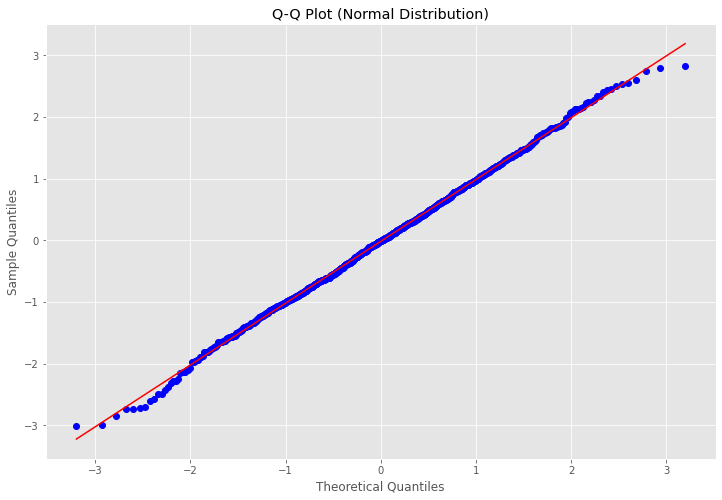

In [21]:
# Generate some data (e.g., normally distributed)
data = np.random.normal(loc=0, scale=1, size=1000)

# Create the Q-Q plot
stats.probplot(data, dist="norm", plot=plt)

# Customize the plot
plt.title("Q-Q Plot (Normal Distribution)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)

# Show the plot
plt.show()

## t-Tests PlantGrowth Dataset Application
SciPy API Statistical functions (scipy.stats) ttest_ind (2024). 
Available at:    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

### Example Data

In [19]:
# Example Data
trt1 = [5.1, 5.5, 5.8, 6.0, 5.4]
trt2 = [6.2, 6.5, 6.1, 6.3, 6.4]

### 1. One-Sample t-test

In [21]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
# 1. One-Sample t-test
print("One-sample t-test")
t_stat, p_value = ttest_1samp(trt1, popmean=5.0)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

One-sample t-test
T-statistic: 3.570429593154692, p-value: 0.023366759912547764


### 2. Independent Two-Sample t-test (Assuming equal variances)

In [22]:
# 2. Independent Two-Sample t-test (Assuming equal variances)
print("\nIndependent two-sample t-test")
t_stat, p_value = ttest_ind(trt1, trt2, equal_var=True)
print(f"T-statistic: {t_stat}, p-value: {p_value}")



Independent two-sample t-test
T-statistic: -4.301162633521313, p-value: 0.0026116483860403484


### 3. Paired t-test

In [23]:
# 3. Paired t-test
print("\nPaired t-test")
trt1_post = [5.3, 5.7, 6.0, 6.2, 5.6] # Hypothetical "after" measurements
t_stat, p_value = ttest_rel(trt1, trt1_post)
print(f"T-statistic: {t_stat}, p-value: {p_value}")


Paired t-test
T-statistic: -1125350553354519.9, p-value: 3.741105323583275e-60


#### Summary and analysis.
One-sample t-test
T-statistic: 3.570429593154692, p-value: 0.023366759912547764

Independent two-sample t-test
T-statistic: -4.301162633521313, p-value: 0.0026116483860403484

Paired t-test
T-statistic: -1125350553354519.9, p-value: 3.741105323583275e-60

As regard the above t-test results we note that p-values of One-Sample t-test and Independent two-sample t-test are <0.05. However' the p-value of the Paired t-test is >0.05.

### t-Tests Assumptions Application within the PlantGrowth Dataset R

Performing the Normality Test (Lilliefors) and Homogeneity of variances Test(Levene's Test)
calibrated on the PlantGrowth Dataset R.

In [28]:
# Relavant Python Package for this computation.
from statsmodels.stats.diagnostic import lilliefors

In [29]:
# Replicating the PlantGrowth dataset
data = {
    "weight": [4.17, 5.58, 5.18, 6.11, 4.5, 4.61, 5.17, 4.53, 5.33, 5.14,
               4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69,
               6.31, 5.12, 5.54, 5.5, 5.37, 5.29, 4.92, 6.15, 5.8, 5.26],
    "group": ["ctrl"]*10 + ["trt1"]*10 + ["trt2"]*10
}
df = pd.DataFrame(data)

In [30]:
data

{'weight': [4.17,
  5.58,
  5.18,
  6.11,
  4.5,
  4.61,
  5.17,
  4.53,
  5.33,
  5.14,
  4.81,
  4.17,
  4.41,
  3.59,
  5.87,
  3.83,
  6.03,
  4.89,
  4.32,
  4.69,
  6.31,
  5.12,
  5.54,
  5.5,
  5.37,
  5.29,
  4.92,
  6.15,
  5.8,
  5.26],
 'group': ['ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2']}

#### 1. Normality test (Lilliefors test for each group)

In [32]:
# 1. Normality test (Lilliefors test for each group)
normality_results = {}
for group in df["group"].unique():
    stat, p = lilliefors(df[df["group"] == group]["weight"])
    normality_results[group] = {"statistic": stat, "p-value": p}


#### Display normality test results

In [33]:
normality_results

{'ctrl': {'statistic': 0.1734716341257333, 'p-value': 0.5315445469408147},
 'trt1': {'statistic': 0.1864701726388076, 'p-value': 0.4236980190411691},
 'trt2': {'statistic': 0.1873822917062824, 'p-value': 0.4165017066424148}}

#### 2. Homogeneity of variances test (Levene's test)

In [ ]:
# 2. Homogeneity of variances test (Levene's test)
stat, p_levene = stats.levene(
    df[df["group"] == "ctrl"]["weight"],
    df[df["group"] == "trt1"]["weight"],
    df[df["group"] == "trt2"]["weight"]

#### Display Levene'test results

In [34]:
stat, p_levene

(0.1873822917062824, 0.3412266241254737)

#### Output results Lilliefors

In [ ]:
# Output results
print("Normality test results (Lilliefors):")
for group, result in normality_results.items():
    print(f"{group}: Statistic = {result['statistic']:.3f}, P-value = {result['p-value']:.3f}")


#### Output Results Levene's Test

In [36]:
print("\nHomogeneity of variances (Levene's test):")
print(f"Statistic = {stat:.3f}, P-value = {p_levene:.3f}")


Homogeneity of variances (Levene's test):
Statistic = 0.187, P-value = 0.341


## Perform a t-test to determine whether there is a significant difference between all faters ctrl, treatment groups trt1 and trt2.

#### Relevant Python Libraries

In [1]:
# Dataframe.
import pandas as pd

# Statistical Package.
from scipy.stats import ttest_ind

#### Sample PlantGrowth-like dataset

In [2]:
# Sample PlantGrowth-like dataset.
data = {
    "weight": [4.17, 5.58, 5.18, 6.11, 4.5, 4.61, 5.17, 4.53, 5.33, 5.14, 4.81, 4.17, 
               4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69, 6.31, 5.12, 5.54, 5.5, 
               5.37, 5.29, 4.92, 6.15, 5.8, 5.26],
    "group": ["ctrl"] * 10 + ["trt1"] * 10 + ["trt2"] * 10
}

In [3]:
data

{'weight': [4.17,
  5.58,
  5.18,
  6.11,
  4.5,
  4.61,
  5.17,
  4.53,
  5.33,
  5.14,
  4.81,
  4.17,
  4.41,
  3.59,
  5.87,
  3.83,
  6.03,
  4.89,
  4.32,
  4.69,
  6.31,
  5.12,
  5.54,
  5.5,
  5.37,
  5.29,
  4.92,
  6.15,
  5.8,
  5.26],
 'group': ['ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2']}

#### Convert to DataFrame

In [4]:
# Convert to DataFrame.
df = pd.DataFrame(data)

# Split data into groups.
ctrl = df[df['group'] == 'ctrl']['weight']
trt1 = df[df['group'] == 'trt1']['weight']
trt2 = df[df['group'] == 'trt2']['weight']


In [5]:
ctrl

0    4.17
1    5.58
2    5.18
3    6.11
4    4.50
5    4.61
6    5.17
7    4.53
8    5.33
9    5.14
Name: weight, dtype: float64

In [6]:
trt1

10    4.81
11    4.17
12    4.41
13    3.59
14    5.87
15    3.83
16    6.03
17    4.89
18    4.32
19    4.69
Name: weight, dtype: float64

In [7]:
trt2

20    6.31
21    5.12
22    5.54
23    5.50
24    5.37
25    5.29
26    4.92
27    6.15
28    5.80
29    5.26
Name: weight, dtype: float64

#### Perform t-tests ctrl vs  trt1

In [8]:
# Perform t-tests ctrl vs  trt1.
print("Independent t-test: ctrl vs trt1")
t_stat, p_value = ttest_ind(ctrl, trt1, equal_var=True)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

Independent t-test: ctrl vs trt1
T-statistic: 1.191, p-value: 0.249


#### Perform t-tests ctrl vs  trt2

In [9]:
# Perform t-tests ctrl vs  trt2.
print("\nIndependent t-test: ctrl vs trt2")
t_stat, p_value = ttest_ind(ctrl, trt2, equal_var=True)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")


Independent t-test: ctrl vs trt2
T-statistic: -2.134, p-value: 0.047


#### Perform t-tests trt1 vs  trt2

In [10]:
# Perform t-tests trt1 vs  trt2
print("\nIndependent t-test: trt1 vs trt2")
t_stat, p_value = ttest_ind(trt1, trt2, equal_var=True)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")



Independent t-test: trt1 vs trt2
T-statistic: -3.010, p-value: 0.008


### t-Test Results Interpretation

https://builtin.com/data-science/t-test-python#:~:text=One%2DSample%20T%2DTest%20Example%20Results&text=The%20greater%20the%20absolute%20value,favor%20of%20the%20alternative%20hypothesis.
The t-statistic is a measure that shows the difference between the sample mean and the hypothesized population mean. The greater the absolute value of the t-statistic, the larger the difference between the two means(Builtin.com,2024).

The p-value is a probability that measures the evidence against the null hypothesis. A smaller p-value indicates stronger evidence in favor of the alternative hypothesis. If the p-value is less than our chosen significance level (0.05 in this case), we reject the null hypothesis, suggesting there is a significant difference between the sample mean and the hypothesized population mean((Builtin.com,2024).

With regard to the above t-test results, I reject the Nulle Hypothesis and conclude that there is a significant difference between the sample mean and the hypothesized population mean for t-test of the two treatment groups trt1 and trt2; because the p-value resulted from the t-test is < 0.05 signifance level. The same determination is applicable to t-test performed between ctrl vs trt2. Notwithstanding, I uphold the Nulle Hypothesis for the t-test between ctrl vs trt1 because their p-value is > 0.05 significance level. I therefore, check below, the mean weight of each group using df.groupby.mean() function and df.describe() on the PlantGrowth Dataset. 

#### Check the mean of each group

In [13]:
# DataFrame with Pandas.
df = pd.DataFrame(data)

# Calculate the mean weight for each group
mean_per_group = df.groupby("group")["weight"].mean()

# Execute the program.
print(mean_per_group)

group
ctrl    5.032
trt1    4.661
trt2    5.526
Name: weight, dtype: float64


In [14]:
# check the initial mean from the PlanGrowth dataset on a descriptive statistics viewpoint. 
df.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


## Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

In [27]:
print("\nIndependent t-test: trt1 vs trt2")
t_stat, p_value = ttest_ind(trt1, trt2, equal_var=True)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")


Independent t-test: trt1 vs trt2
T-statistic: -3.010, p-value: 0.008


Due to p-value <0.05 significance level, I dismiss the Nulle Hypothesis and determine that there is a significance difference between the two treatement groups trt1 and trt2.

# Part II 

## ANOVA (Analysis of Variance)


### One-way ANOVA
https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of two or more independent (unrelated) groups (although you tend to only see it used when there are a minimum of three, rather than two groups). For example, you could use a one-way ANOVA to understand whether exam performance differed based on test anxiety levels amongst students, dividing students into three independent groups (e.g., low, medium and high-stressed students). Also, it is important to realize that the one-way ANOVA is an omnibus test statistic and cannot tell you which specific groups were statistically significantly different from each other; it only tells you that at least two groups were different. Since you may have three, four, five or more groups in your study design, determining which of these groups differ from each other is important. You can do this using a post hoc test(Laer Statistics, 2024). Available at: https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php (Accessed, on 14/12/2024).



### ANOVA Assumptions
There are six assumptions that are required for a one-way ANOVA to give a valid result. These include the following:

**Assumption** **#1**: Your **dependent** variable should be measured at the interval or ratio level.

**Assumption** **#2**: Your **independent** variable should consist of two or more categorical, independent groups. 

**Assumption** **#3**: You should have **independence of observations**, which means that there is no relationship between the observations in each group or between the groups themselves.

**Assumption** **#4**: There should be **no significant outliers**. 

**Assumption** **#5**: Your dependent variable should be approximately **normally distributed** for each category of the independent variable. 

**Assumption** **#6**: There needs to be **homogeneity of variances**.
Laer Statistics (2024). Available at: https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php (Accessed, on 14/12/2024).

### Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2

In [29]:
# ANOVA for ctrl, trt1, trt2
f_stat, p_value_anova = stats.f_oneway(ctrl, trt1, trt2)
print(f"ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_value_anova:.4e}")

ANOVA: F-statistic = 4.85, p-value = 1.5910e-02


The ANOVA test is preferred for the initial analysis to assess whether there are any group differences without inflating the Type I error rate.

If the ANOVA test is significant, you can follow up with post-hoc tests (e.g., Tukey’s HSD) to identify which specific groups differ. This ensures a robust and statistically sound analysis.

### Post-hoc test using Tukey's Honest Significant Difference (HSD) after performing ANOVA. This identifies which specific groups (ctrl, trt1, trt2) differ significantly.

#### Relevant Python Module

In [16]:
# Statistical.
from statsmodels.stats.multicomp import pairwise_tukeyhsd


#### Perform Tukey's HSD test

In [17]:
# Perform Tukey's HSD test.
tukey = pairwise_tukeyhsd(df['weight'], df['group'], alpha=0.05)


#### Call tukey

In [21]:
# Call tukey.
tukey 

#### Print results

In [22]:
# Print results.
print("\nTukey's HSD Results:")
print(tukey)



Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3921 -1.0621 0.3201  False
  ctrl   trt2    0.494  0.198 -0.1971 1.1851  False
  trt1   trt2    0.865  0.012  0.1739 1.5561   True
---------------------------------------------------


#### Plot results

C:\Users\jeans\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


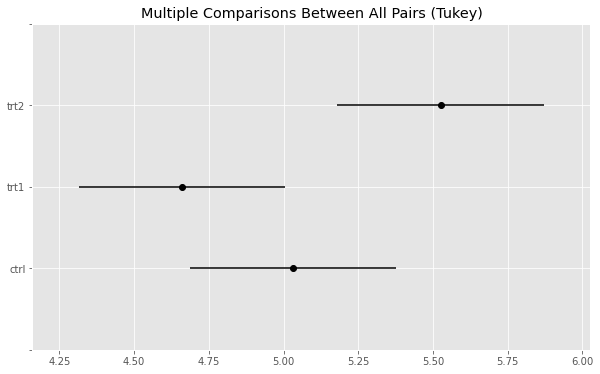

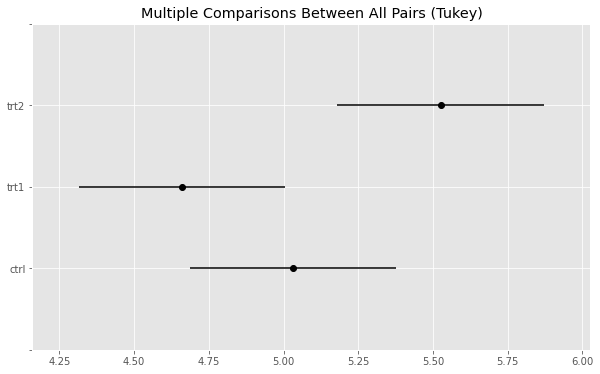

In [19]:
# Plot results
tukey.plot_simultaneous()

## ANOVA Assumptions

In [5]:
# Access the PlantGrowth dataset calling df variable.
df

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


### Create three arrays of data from the dataset PlantGrowth

In [6]:
# 3 arrays of data from PlantGrowth dataset into a variable called data 10 entries for each group:ctrl,trt1 and trt2.
data = {
    "group": ["ctrl"] * 10 + ["trt1"] * 10 + ["trt2"] * 10,
    "weight": (
        [4.17, 5.58, 5.18, 6.11, 4.50, 4.61, 5.17, 4.53, 5.33, 5.14] + # ctrl
        [4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69] + # trt1
        [6.31, 5.12, 5.54, 5.50, 5.37, 5.29, 4.92, 6.15, 5.80, 5.26] # trt2           
    ),
}
df = pd.DataFrame(data)


In [11]:
data

{'group': ['ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2'],
 'weight': [4.17,
  5.58,
  5.18,
  6.11,
  4.5,
  4.61,
  5.17,
  4.53,
  5.33,
  5.14,
  4.81,
  4.17,
  4.41,
  3.59,
  5.87,
  3.83,
  6.03,
  4.89,
  4.32,
  4.69,
  6.31,
  5.12,
  5.54,
  5.5,
  5.37,
  5.29,
  4.92,
  6.15,
  5.8,
  5.26]}

### Group data

In [ ]:
# Group data
ctrl = df[df['group'] == 'ctrl']['weight']
trt1 = df[df['group'] == 'trt1']['weight']
trt2 = df[df['group'] == 'trt2']['weight']


### Tests for ANOVA Assumptions

### Relevant Python Packages

In [66]:
# Relevant Python Module Assumption Tests.
from scipy.stats import shapiro, levene

#### 1. Test for Normality (Shapiro-Wilk test)


#### Assumption # 5: Normality
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php

Your dependent variable should be approximately **normally distributed** for each category of the independent variable. 

In [18]:
# 1. Test for Normality (Shapiro-Wilk test)
print("Normality Tests:")
for group_name, group_data in {"ctrl": ctrl, "trt1": trt1, "trt2": trt2}.items():
    stat, p = shapiro(group_data)
    print(f"{group_name}: p-value = {p:.4f} ({'Normal' if p > 0.05 else 'Not Normal'})")



Normality Tests:
ctrl: p-value = 0.7475 (Normal)
trt1: p-value = 0.4519 (Normal)
trt2: p-value = 0.5643 (Normal)


#### 2. Test for Homogeneity of Variances (Levene’s test)

**Assumption** **#6**: There needs to be **homogeneity of variances**. https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php

In [35]:
# 2. Test for Homogeneity of Variances (Levene’s test)
stat, p = levene(ctrl, trt1, trt2)
print(f"\nHomogeneity of Variances: p-value = {p:.4f} ({'Equal Variances' if p > 0.05 else 'Unequal Variances'})")



Homogeneity of Variances: p-value = 0.3134 (Equal Variances)


## Preference ANOVA vs Multiple t-Tests
https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php

### Explanation

Every time we conduct a t-test there is a chance that we will make a Type I error. This error is usually 5%. By running two t-tests on the same data ywe will have increased our chance of "making a mistake" to 10%. An ANOVA controls for these errors so that the Type I error remains at 5% and we can be more confident that any statistically significant result we find is not just running lots of tests. 

In substance, when analyzing data from more than two groups, ANOVA (Analysis of Variance) is more appropriate than conducting multiple t-tests for the following reasons:

Control of Type I Error Rate, efficiency and interpretation. 

1. Control of Type I Error Rate
Each t-test carries a risk of Type I error (false positive). Conducting multiple t-tests increases the cumulative probability of making a Type I error. ANOVA tests for differences across all groups simultaneously while maintaining the overall Type I error rate at the specified significance level.

2. Efficiency
ANOVA is a single test that evaluates whether there are any significant differences between group means. Conducting multiple t-tests is less efficient as it requires more tests and pairwise comparisons.

3. Interpretation
ANOVA provides a unified framework to test for differences between multiple groups.

## Preference ANOVA vs Multiple t-Tests At Play

### Step 1: Access PlantGrowth Dataset using Pandas DataFrame() function

In [24]:
# PlantGrowth dataset

data = {
            
        "ctrl": [4.17, 4.81, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69], # ctrl
        "trt1": [4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69], # trt1
        "trt2": [6.11, 5.74, 5.80, 5.25, 5.89, 5.26, 5.71, 5.00, 5.27, 5.00] # trt2
    
}
df = pd.DataFrame(data)

In [69]:
data

{'group': ['ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'ctrl',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt1',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2',
  'trt2'],
 'weight': [3.181357332405624,
  5.177785016059804,
  4.313323055917288,
  4.027724670433865,
  4.068608357573517,
  4.570689740016084,
  3.6431411473587683,
  4.445485660445204,
  3.1256169330077217,
  4.443169208685986,
  3.084208718059899,
  3.962579955181532,
  4.356396978758491,
  3.3420357495643795,
  5.647513862465456,
  5.499305251319027,
  4.3515870686302875,
  4.823634560588556,
  4.3172450555462065,
  4.6436015950149,
  6.201376278224378,
  5.577630397458831,
  5.725185615564965,
  6.13915935753073,
  6.2062457948051515,
  6.830711145328878,
  6.699761059514857,
  6.520987166708726,
  6.1890275013894325,
  6.0544874272994]}

In [70]:
df

,group,weight
0,ctrl,3.181357
1,ctrl,5.177785
2,ctrl,4.313323
3,ctrl,4.027725
4,ctrl,4.068608
5,ctrl,4.570690
6,ctrl,3.643141
7,ctrl,4.445486
8,ctrl,3.125617
9,ctrl,4.443169


### Step 2: Perform ANOVA

In [64]:
#Step 2: Perform ANOVA

from scipy.stats import f_oneway
# Separate groups
ctrl = df[df["group"] == "ctrl"]["weight"]
trt1 = df[df["group"] == "trt1"]["weight"]
trt2 = df[df["group"] == "trt2"]["weight"]
# Perform one-way ANOVA
f_stat, p_value = f_oneway(ctrl, trt1, trt2)

print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("At least one group mean is significantly different.")
else:
    print("No significant difference between group means.")

ANOVA F-statistic: 31.76, p-value: 0.0000
At least one group mean is significantly different.


### Step 3: Perform Multiple t-tests.

In [68]:
# Step 3: Perform Multiple t-tests.

from scipy.stats import ttest_ind

# Pairwise t-tests
pairs = [
    ("ctrl vs trt1", ttest_ind(ctrl, trt1)),
    ("ctrl vs trt2", ttest_ind(ctrl, trt2)),
    ("trt1 vs trt2", ttest_ind(trt1, trt2)),]
# Display results  
for pair, (stat, p) in pairs:
    print(f"{pair} - t-statistic: {stat:.2f}, p-value: {p:.4f}")

ctrl vs trt1 - t-statistic: -0.92, p-value: 0.3688
ctrl vs trt2 - t-statistic: -8.92, p-value: 0.0000
trt1 vs trt2 - t-statistic: -6.30, p-value: 0.0000


## Perform a post-hoc "Tukey's HSD(Honest Standard Test)

Perform a post-hoc "Tukey's HSD  as at least one group mean is significantly different from the ANOVA
in view to identify which specific groups differ.

In [95]:
# Import relevant Python module.
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD
tukey = pairwise_tukeyhsd(df["weight"], df["group"], alpha=0.05)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3921 -1.0621 0.3201  False
  ctrl   trt2    0.494  0.198 -0.1971 1.1851  False
  trt1   trt2    0.865  0.012  0.1739 1.5561   True
---------------------------------------------------


In [72]:
# Check the mean.
print(df.mean())

weight    4.905653
dtype: float64


### Seaborn boxplot for visualizing group distributions

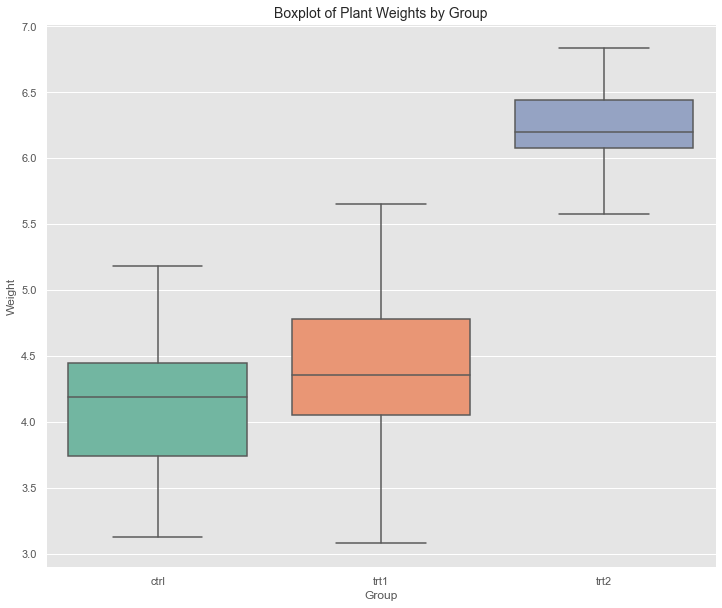

In [91]:
# Seaborn boxplot for visualizing group distributions
plt.figure(figsize=(12, 10))
sns.boxplot(x='group', y='weight', data=data, palette='Set2')
plt.title('Boxplot of Plant Weights by Group', fontsize=14)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.show()


### Seaborn displot for visualizing overall and group-specific distributions

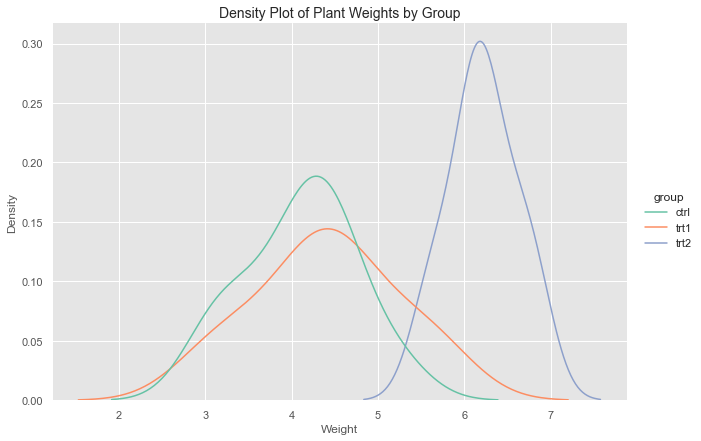

In [92]:
# Seaborn displot for visualizing overall and group-specific distributions
sns.displot(data, x='weight', hue='group', kind='kde', height=6, aspect=1.5, palette='Set2')
plt.title('Density Plot of Plant Weights by Group', fontsize=14)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

### Explanation Boxplot and Density Plot

**Explanation**:

1. Boxplot:

Shows the weight distribution for each group (ctrl, trt1, trt2). Highlights differences in medians and variability among groups.

2. Density Plot:

Demonstrates the smoothed distribution of weights for each group. Overlaps and separation between the groups are observed easely.

Both plots assist to visually confirm the parallelism observed in the statistical analysis.


# Conclusion

In this project, I have been asked to analyze the PlantGrowth R dataset. I have performed t-tests and ANOVA on this dataset while describing the dataset and explaining my undertaking. In so doing I have taken the following steps. These include:

Downloading and saving the dataset, describing the data set in my notebook, describing what a t-test is, how it works, and what the assumptions are. I performed a t-test to determine whether there is a significant difference between the two treatment groups **trt1 and trt2**, and performed also ANOVA(Analysis of variances) to determine whether there is a significant difference between the three treatment groups **ctrl, trt1, and trt2**. Finally, I explained why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups. Comments populated throughout the assessement and within each Jupyter Notebook cell code are self-explanatory and provide guidance on how to proceed, conceive and apply Python codes. I have used consistent sources to finalise my work on the Applied Statistics module for this semester. I have deepen my understanding on how to calibrate t-tests and ANOVA on variables and/or groups using Python Programming Language.

<br>

# End

***